In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from subprocess import check_output
from matplotlib import pyplot

In [ ]:
train = pd.read_csv("train.csv")
train_result = pd.read_csv("train_result.csv")
test = pd.read_csv("test.csv")

In [ ]:
train_x = train.astype('float32')
train_y = train_result.astype('int32')
test_x = test.astype('float32')

In [ ]:
train_x.shape, train_y.shape, test_x.shape

((50000, 1569), (50000, 2), (10000, 1569))

In [ ]:
#Removing empty feature
train_x = train_x.to_numpy()[:,:-1]
#Reshaping as tensor
train_x = train_x.reshape((train_x.shape[0], 28, 56)).astype('float32')
#Chaning normalization from [-1:1] to [0:1]
train_x = train_x / 2 + 0.5


#Removing empty feature
test_x = test_x.to_numpy()[:,:-1]
#Reshaping as tensor
test_x = test_x.reshape((test_x.shape[0], 28, 56)).astype('float32')
#Chaning normalization [-1:1] to [0:1]
test_x = test_x / 2 + 0.5

#Removing empty feature
train_y = train_y.to_numpy()[:,1]

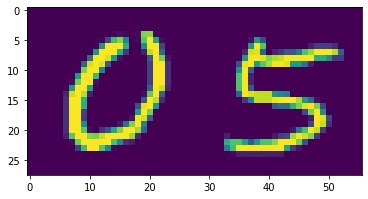

In [ ]:
pyplot.imshow(train_x[0])

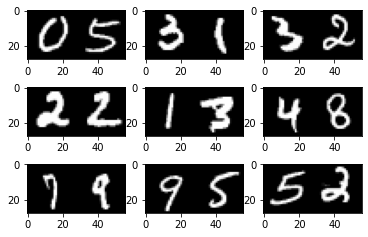

In [ ]:
#Showing the first 9 examples from the training dataset
fig, ax = pyplot.subplots(3, 3)
ax[0, 0].imshow(train_x[0], cmap=pyplot.get_cmap('gray'))
ax[0, 1].imshow(train_x[1], cmap=pyplot.get_cmap('gray'))
ax[0, 2].imshow(train_x[2], cmap=pyplot.get_cmap('gray'))
ax[1, 0].imshow(train_x[3], cmap=pyplot.get_cmap('gray'))
ax[1, 1].imshow(train_x[4], cmap=pyplot.get_cmap('gray'))
ax[1, 2].imshow(train_x[5], cmap=pyplot.get_cmap('gray'))
ax[2, 0].imshow(train_x[6], cmap=pyplot.get_cmap('gray'))
ax[2, 1].imshow(train_x[7], cmap=pyplot.get_cmap('gray'))
ax[2, 2].imshow(train_x[8], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
#train_y labels -> 1-Hot notation
train_y = tf.keras.utils.to_categorical(train_y, num_classes = 19)

In [ ]:
#First model of the neural network (Classical/Dense neural network)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = "relu", input_shape = (28,56,1)),
    tf.keras.layers.Dense(256, activation = "relu"),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(19, activation = "softmax")
])

In [ ]:
#Second model (Convolutional neural network)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = "relu", input_shape = (28,56,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu', padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(19, activation = 'softmax')
])
model.summary()

In [ ]:
opti = tf.keras.optimizers.Adam(
    learning_rate = 0.0007,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-07,
    name = "Adam"
)
model.compile(optimizer = opti, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_x, train_y, batch_size = 50, epochs = 25)

In [ ]:
#Predicting the data in the test dataset
results = model.predict(test_x)
results = np.argmax(results, axis = 1)
results = pd.Series(results, name="Class")

In [ ]:
#Saving the predictions in submission.csv
submission = pd.concat([pd.Series(range(0,10000),name = "Index"), results], axis = 1)
submission.to_csv("submission.csv", index=False)